# iFood Advanced Data Analyst Case
## Introduction

iFood, the leading food delivery app in Brazil, is present in over a thousand cities. The company aims to maintain high customer engagement to solidify its market leadership. This case study presents a sample dataset that simulates customer meta-information and interactions with iFood campaigns. The goal is to analyze the data, uncover business opportunities and insights, and propose data-driven actions to optimize campaign results and generate value for the company.

# **Preprocessing data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ml_project1_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Clean**

In [5]:
df.drop(['Z_CostContact', 'Z_Revenue', 'ID', 'Dt_Customer'], axis = 1, inplace = True)

In [6]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
numerical_columns = df.drop(['Education', 'Marital_Status'],axis = 1)
categorical_columns = df[['Education', 'Marital_Status']]

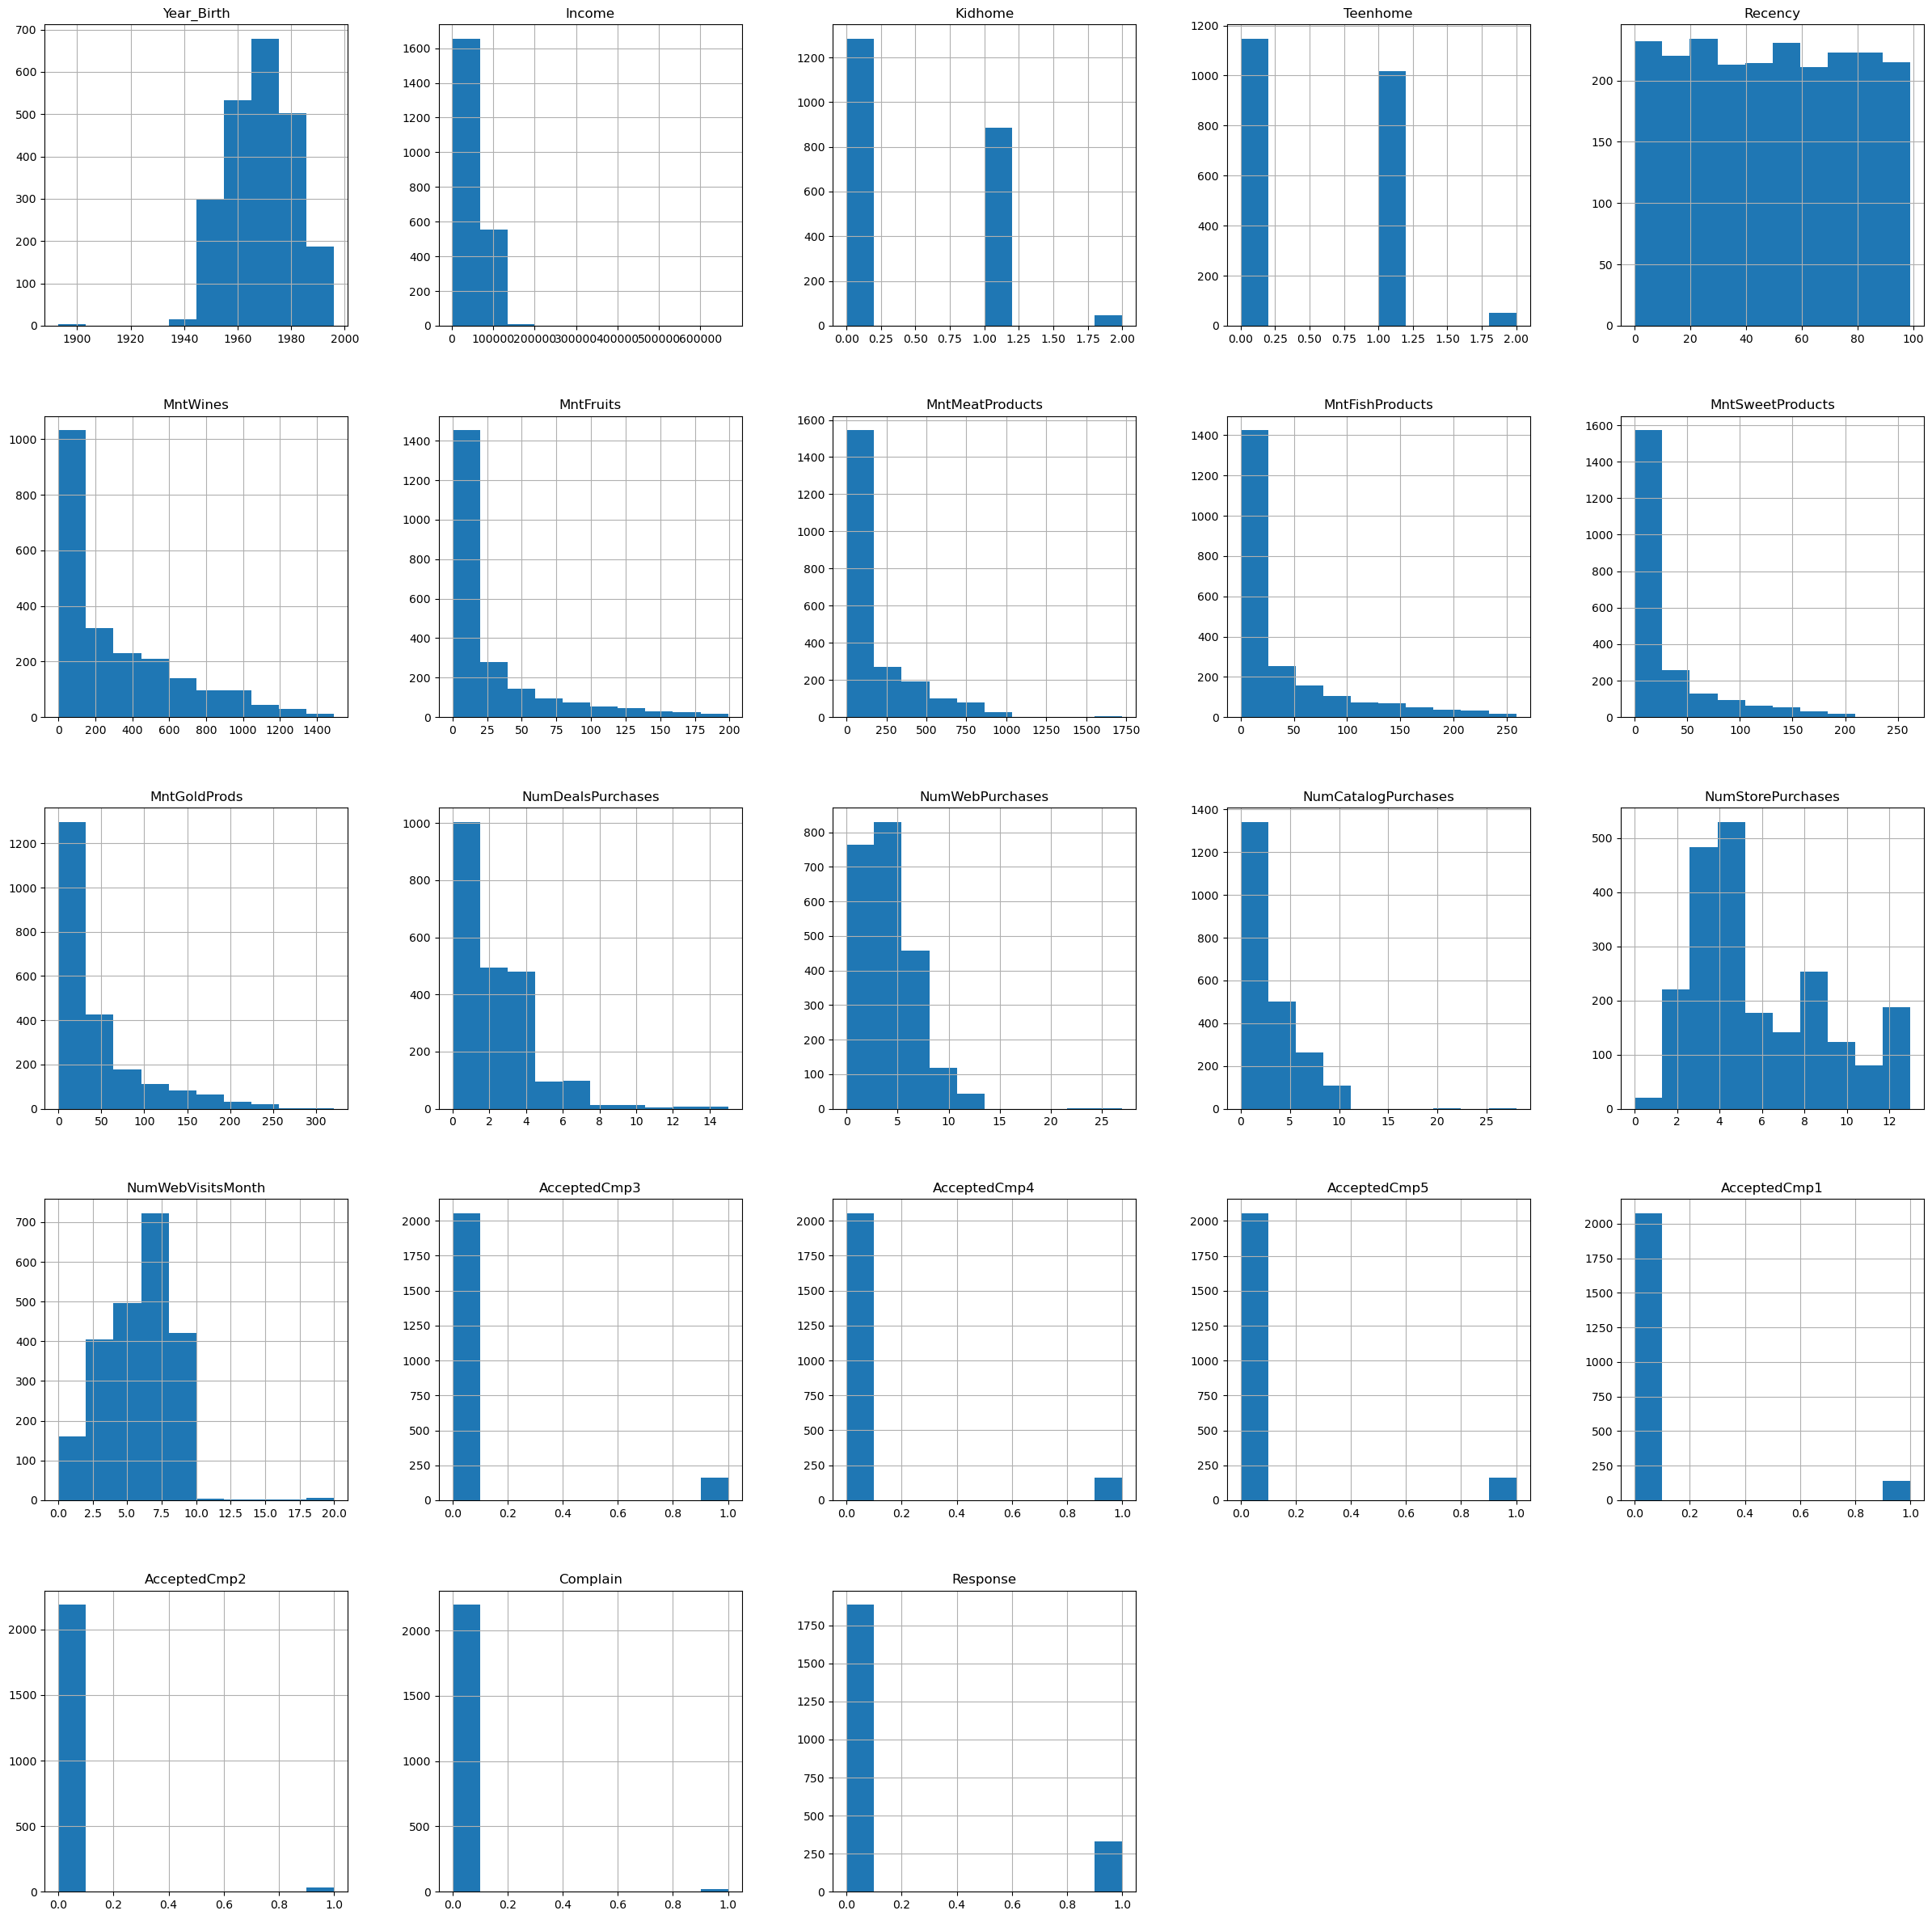

<Figure size 640x480 with 0 Axes>

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30,30))

plt.figure()
for i,column in enumerate(numerical_columns.columns):
    row = i // 5
    col = i % 5
    df.hist(column, ax =axes[row][col])

plt.delaxes(ax=axes[4][4])
plt.delaxes(ax=axes[4][3])
plt.tight_layout()
plt.show()

## Outliers

In [11]:
df['Age'] = df['Year_Birth'].apply(lambda x: 2020-x)
df.drop(['Year_Birth'], axis = 1, inplace = True)

In [12]:
features = ['Income', 'MntWines', 'NumWebPurchases', 'NumWebVisitsMonth', 'Age']

In [13]:
features

for column in features:
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5*IQR)

    df = df[df[column] < upper_fence]

In [14]:
df.Marital_Status.value_counts()

Marital_Status
Married     837
Together    557
Single      458
Divorced    226
Widow        74
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
unwanted_values = ['Alone','Absurd','YOLO']
df = df[~df['Marital_Status'].isin(unwanted_values)]

In [16]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,...,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000,2152.000000
mean,51385.993959,0.449349,0.508364,49.124535,291.382900,26.457714,162.703996,37.714684,26.994888,43.611524,...,5.830390,5.307156,0.072955,0.067844,0.063197,0.060409,0.009758,0.009294,0.144052,51.030669
std,20306.031518,0.538814,0.542841,28.901785,314.273757,39.918887,216.397941,54.968115,40.981343,50.663846,...,3.231577,2.277982,0.260124,0.251536,0.243374,0.238298,0.098324,0.095977,0.351224,11.640556
min,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,35178.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
50%,50954.000000,0.000000,0.000000,49.000000,172.500000,8.000000,67.000000,12.000000,8.000000,25.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
75%,67480.500000,1.000000,1.000000,74.000000,492.000000,33.000000,223.000000,50.000000,33.000000,56.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,105471.000000,2.000000,2.000000,99.000000,1230.000000,199.000000,1725.000000,259.000000,198.000000,249.000000,...,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000


# **Data Preperations**

## **Grouping age**

Grouping age simplifies the analysis by reducing the number of unique values, making it easier to visualize and interpret.

In [17]:
def categorize_age(age):
    if age >= 24 and age < 34:
        return '24-34'
    elif age >= 35 and age < 44:
        return '35-44'
    elif age >= 45 and age < 54:
        return '45-54'
    elif age >= 55 and age < 64:
        return '55-64'
    elif age >= 65 and age < 75:
        return '65-74'
    else:
        return '75+'

# Apply the categorize_age function to create AgeGroup column
df['AgeGroup'] = df['Age'].apply(categorize_age)

## **Grouping Income**

Same reason as grouping age



In [18]:
income_bins = [df['Income'].min(), 35178, 67480, df['Income'].max()]
income_labels = ['Low', 'Medium', 'High']
df['Income Quintile'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# **Demographics Destribution**



## **Percentages Calculation**

In [19]:
def calculate_percentage_counts(column):
    value_counts = column.value_counts()
    percentages = round((value_counts / len(column)) * 100, 1)
    result_df = pd.DataFrame({'Value': value_counts, 'Percentage': percentages})
    return result_df

In [20]:
age = calculate_percentage_counts(df['AgeGroup'])
education = calculate_percentage_counts(df['Education'])
marital_status = calculate_percentage_counts(df['Marital_Status'])
kid_home = calculate_percentage_counts(df['Kidhome'])
teen_home = calculate_percentage_counts(df['Teenhome'])
income_quintile = calculate_percentage_counts(df['Income Quintile'])
back_ground_char = [education,marital_status, kid_home, teen_home, income_quintile]

### **Age**

In [21]:
print('Table 1: Distribution of respondents by age')
total_count = age['Value'].sum()
age['Percentage'] = round((age['Value'] / total_count) * 100,2)
age

Table 1: Distribution of respondents by age


,Value,Percentage
AgeGroup,,
45-54,613,28.49
55-64,420,19.52
35-44,406,18.87
65-74,325,15.10
75+,248,11.52
24-34,140,6.51


Table 1 shows that the majority of the respondents are the age group 45-54 (28.49 %), followed by age group 55-64 (19.52%), 35-44 group (18.87%), 65-75 group (15.1%), 75+ group (11.52%) and 24-34 (6.51%).


### **Education**

In [22]:
print('Table 2: Distribution of respondents by level of education')

education

Table 2: Distribution of respondents by level of education


,Value,Percentage
Education,,
Graduation,1095,50.9
PhD,449,20.9
Master,356,16.5
2n Cycle,198,9.2
Basic,54,2.5


Table 2 shows that the majority of the respondents are Graduates  (50.9%), followed by PhD (20.9%), Master (16.5%), 2n Cycle (9.2%) and Basic (2.5%).

### **Marital Status**

In [23]:
print('Table 3: Distribution of respondents by marital status')
marital_status

Table 3: Distribution of respondents by marital status


,Value,Percentage
Marital_Status,,
Married,837,38.9
Together,557,25.9
Single,458,21.3
Divorced,226,10.5
Widow,74,3.4


Table 3 shows that the majority of the respondents are married (38.9%), followed by together (25.9%), single (21.3%), divorced (10.5%) and widowed (3.4%).


### **Kidhome**

In [24]:
print('Table 4: Distribution of respondents by number of small kids in a household')
kid_home

Table 4: Distribution of respondents by number of small kids in a household


,Value,Percentage
Kidhome,,
0,1231,57.2
1,875,40.7
2,46,2.1


**Insights**


Table 4 shows that the majority of the respondents (57.2%) do not have small children, followed by one small child (40.7%) and two small children (2.1%).

## Teenhome

In [25]:
print('Table 5: Distribution of respondents by number of teenagers in a household')
teen_home

Table 5: Distribution of respondents by number of teenagers in a household


,Value,Percentage
Teenhome,,
0,1106,51.4
1,998,46.4
2,48,2.2


**Insights**

Table 5 shows that the majority of the respondents (51.4%) do not have teenagers, followed by one teenager (46.4%) and two teenagers (2.2%).


## Income

In [26]:
income_quintile

,Value,Percentage
Income Quintile,,
Medium,1075,50.0
Low,538,25.0
High,538,25.0


Table 6 shows that the majority of the respondents are in the Medium-income group (50%), followed by the High-income group (25%) and the Low-income group (25%).


# **Campaign Response Analysis**

## Response

In [27]:
df['Response'].value_counts()

Response
0    1842
1     310
Name: count, dtype: int64

In [28]:
313/2159*100

14.497452524316815

15 percent of the respondents from the last campaign accepted the offer.

## **Campaign and Last Response Rates by Age**

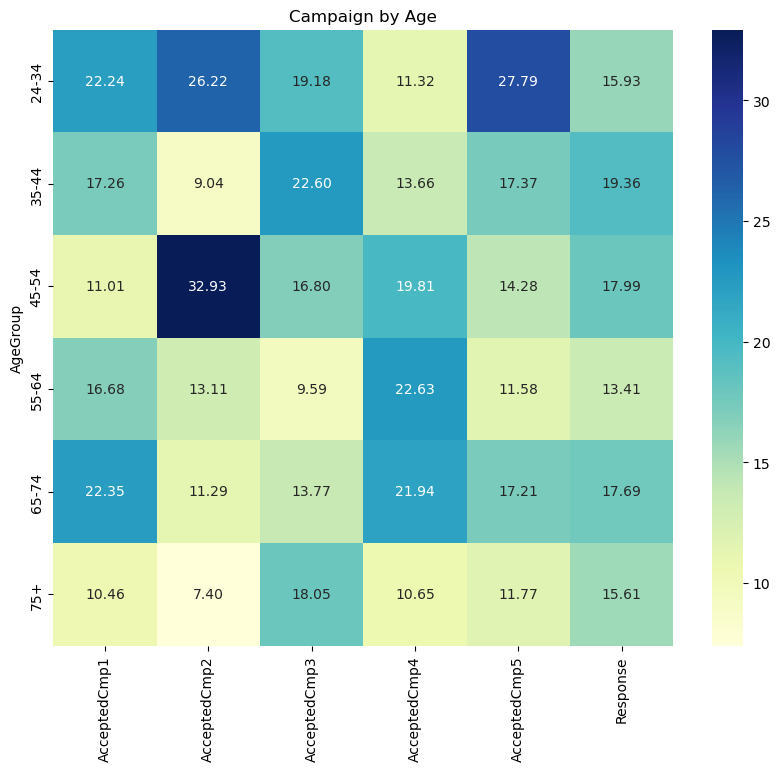

In [29]:
camp_hist_by_age = df.groupby('AgeGroup')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].mean()
camp_hist_by_age_percentage = camp_hist_by_age.div(camp_hist_by_age.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(camp_hist_by_age_percentage, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Campaign by Age')
plt.show()

rewrite. age 24-29 is missing.

**Insights**

* Accepted Campaign 1: Group 65-74 had the highest acceptance rate (22.35%), followed by group 24-34 (22.24%), group 35-44 (17.26%), group 55-64 (16.68%), group 45-54 (11.01%) and group 75+ (10.46%).

* Accepted Campaign 2: Group 45-54 had the highest acceptance rate (32.93%), followed by group 24-34 (26.22%), group 55-64 (13.11%), group 65-74 (11.29%), group 35-44 (9.04%) and group 75+ (7.40%).

* Accepted Campaign 3: Group 35-44 had the highest acceptance rate (22.66%), followed by group 24-34 (19.18%), group 75+ (18.05%), group 45-54 (16.86%), group 65-74 (13.77%) and group 55-64 (9.59%).

* Accepted Campaign 4: Group 55-64 had the highest acceptance rate (22.66%), followed by group 65-74 (21.94%), group 45-54 (19.81%), group 35-44 (13.66%), group 24-34 (11.32%) and group 75+ (10.65%).

* Accepted Campaign 5: Group 24-34 had the highest acceptance rate (27.79%), followed by group 35-44 (17.37%), group 65-74 (17.21%), group 45-54 (14.28%), group 75+ (11.77%) and group 55-64 (11.58%).

* Response(Accepted Campaign 6): Group 35-44 had the highest acceptance rate (19.36%), followed by group 45-54 (17.99%), group 64-74 (17.69%), group 24-34 (15.93%), group 75+ (15.61%) and group 55-64 (13.41%).



## **Campaign and Last Response Rates by Education**

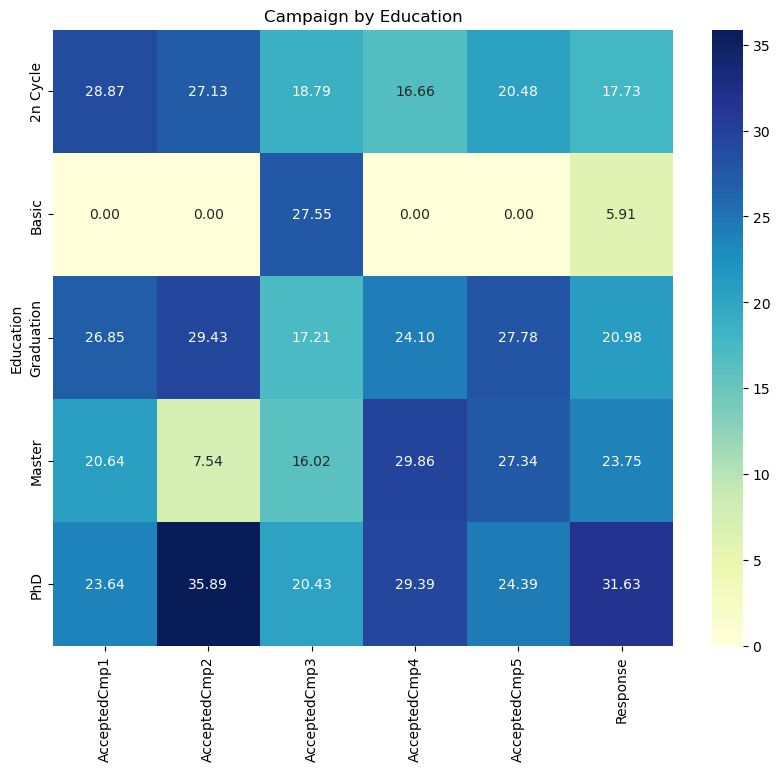

In [30]:
response_by_education = df.groupby('Education')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].mean()
response_by_education_percentage = response_by_education.div(response_by_education.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(response_by_education_percentage, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Campaign by Education')
plt.show()

**Insights**


* Accepted Campaign 1: 2nd Cycle level had the highest acceptance rate with (28.87%), followed by graduate level with (26.85%), PhD level (23.64%), Master level (20.64%), and Basic level (0%).

* Accepted Campaign 2: PhD level had the highest acceptance rate with (35.89%), followed by Graduate level with (29.43%), 2nd Cycle level (27.13%), Master level (7.54%), and Basic level (0%).

* Accepted Campaign 3: Basic level had the highest acceptance rate with (27.55%), followed by PhD level with (20.43%), 2nd Cycle level (18.79%), Graduate level (17.21%), and Master level (16.02%).


* Accepted Campaign 4: Master level had the highest acceptance rate with (29.86%), followed by PhD level with (29.39%), Graduate level (24.10%),  2nd Cycle level (16.66%), and Basic level (0%).

* Accepted Campaign 5: Graduate level had the highest acceptance rate with (27.78%), followed by Master level with (27.34%), PhD level (24.39%),  2nd Cycle level (20.48%), and Basic level (0%).

* Response(Accepted Campaign 6): PhD level had the highest acceptance rate with (31.63%), followed by Master level with (23.75%), Graduate level (20.98%),  2nd Cycle level (17.73%), and Basic level (5.91%).


## **Campaign and Last Response Rates by Marital Status**

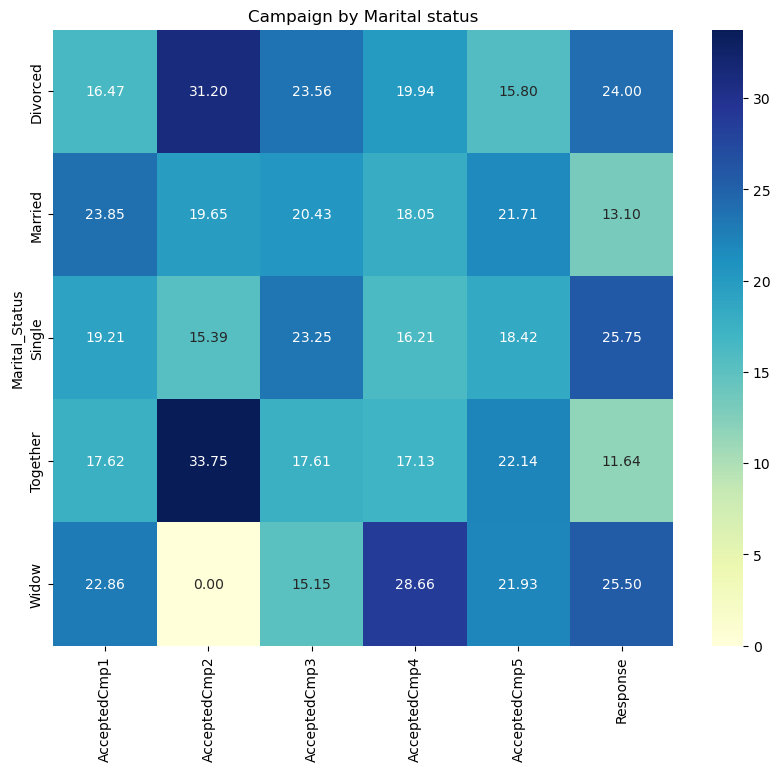

In [31]:
response_by_ms = df.groupby('Marital_Status')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].mean()
response_by_ms_percentage = response_by_ms.div(response_by_ms.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(response_by_ms_percentage, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Campaign by Marital status')
plt.show()

**Insights**

* Accepted Campaign 1: The married group had the highest acceptance rate (23.65%), followed by the widow group (22.86%), the single group (19.21%), the together group (17.62%), and the divorced group (16.47%).

* Accepted Campaign 2: The together group had the highest acceptance rate (33.75%), followed by the divorced group (31.20%), the married group (19.65%), the single group (15.39%), and the widow group (0%).

* Accepted Campaign 3: The divorced group had the highest acceptance rate (23.56%), followed by the single group (23.25%), the married group (20.43%), the together group (17.61%), and the widow group (15.15%).

* Accepted Campaign 4: The widow group had the highest acceptance rate (28.66%), followed by the divorced group (19.94%), the married group (18.05%), the together group (17.13%), and the single group (16.21%).

* Accepted Campaign 5: The together group had the highest acceptance rate (22.14%), followed by the widow group (21.93%), the married group (21.71%), the single group (18.42%), and the divorced group (15.80%).

* Response(Accepted Campaign 6): The single group had the highest acceptance rate (25.75%), followed by the widow group (25.50%), the divorced group (24%), the married group (13.10%), and the together group (11.64%).

## **Campaign and Last Response Rates by total number of children in a household**

### **Kidhome**

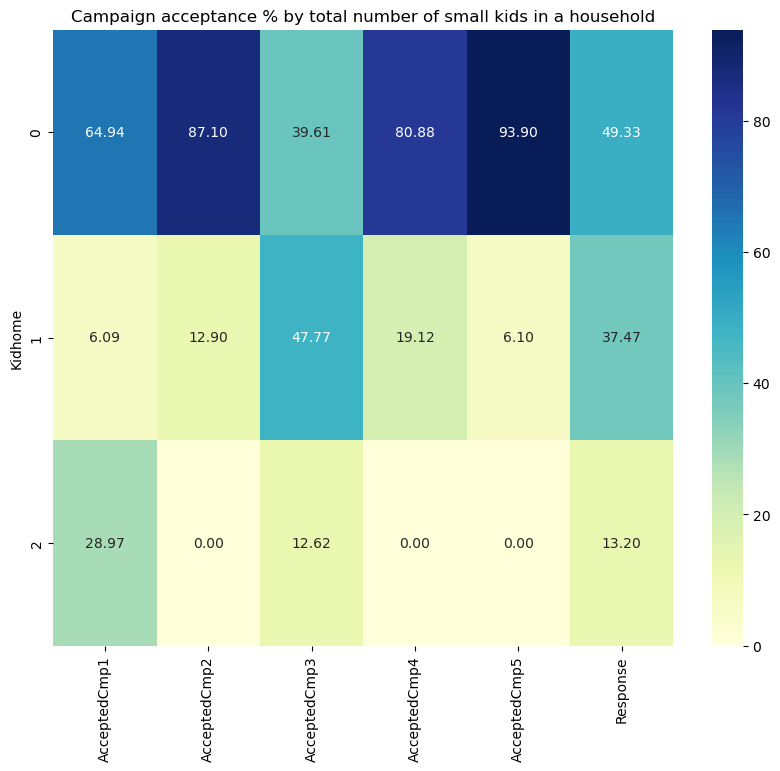

In [32]:
response_by_total_no_of_children = df.groupby('Kidhome')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].mean()
response_by_total_no_of_children_percentage = response_by_total_no_of_children.div(response_by_total_no_of_children.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(response_by_total_no_of_children_percentage, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Campaign acceptance % by total number of small kids in a household')
plt.show()

**Insight**

Accepted Campaign 1:  The highest acceptance rate (64.94%) was found in a home with no small children, followed by a household with two small children (28.97%) and one small child (6.09%).

Accepted Campaign 2:  The highest acceptance rate (87.10%) was found in a home with no small children, followed by a household with 1 small child (12.90%) and two small children (0%).

Accepted Campaign 3:  The highest acceptance rate (47.77%) was found in a home with one small child, followed by a household with no small children (39.61%) and two small children (12.62%).

Accepted Campaign 4:  The highest acceptance rate (80.88%) was found in a home with no small children, followed by a household with one small child (19.12%) and two small children (0%).

Accepted Campaign 5:  The highest acceptance rate (93.90%) was found in a home with no small children, followed by a household with one small child (6.10%) and two small children (0%).

Reaponse(Accepted Campaign 6):  The highest acceptance rate (49.33%) was found in a home with no small children, followed by a household with one small child (37.47%) and two small children (13.20%).

### **Teenhome**

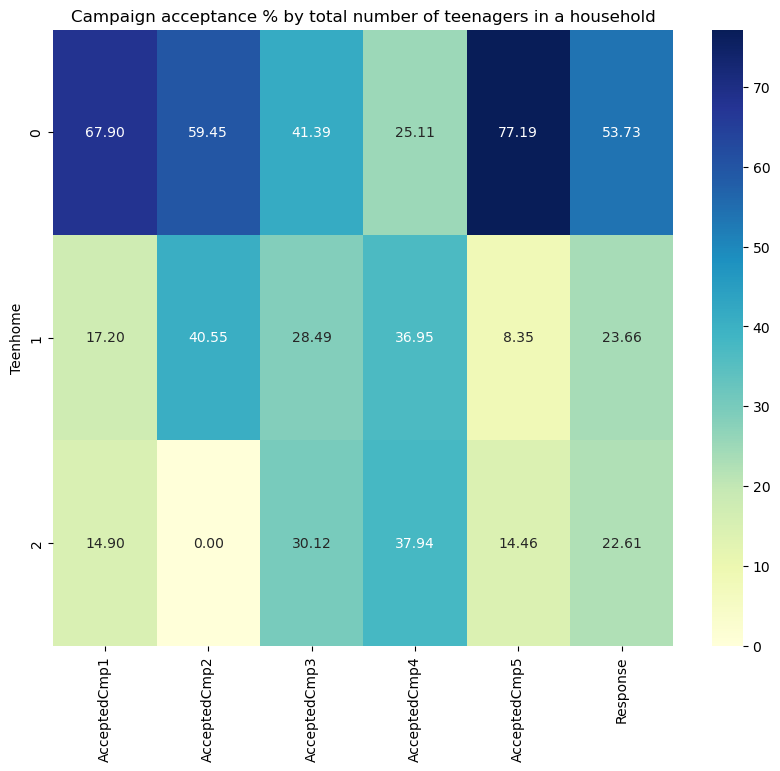

In [33]:
response_by_total_no_of_children = df.groupby('Teenhome')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].mean()
response_by_total_no_of_children_percentage = response_by_total_no_of_children.div(response_by_total_no_of_children.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(response_by_total_no_of_children_percentage, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Campaign acceptance % by total number of teenagers in a household')
plt.show()

**Insight**

Accepted Campaign 1: The highest acceptance rate (67.90%) was found in a home with no teenagers , followed by a household with one teenager (17.20%) and two teenagers (14.90%).

Accepted Campaign 2: The highest acceptance rate (59.45%) was found in a home with no teenagers, followed by a household with 1 teenager (40.55%) and two teenagers (0%).

Accepted Campaign 3: The highest acceptance rate (41.39%) was found in a home with no teenagers, followed by a household with two teenagers (30.12%) and one teenager (28.49%).

Accepted Campaign 4: The highest acceptance rate (37.94%) was found in a home with two teenagers, followed by a household with one teenager (36.95%) and no teenagers (25.11%).

Accepted Campaign 5: The highest acceptance rate (77.19%) was found in a home with no teenagers, followed by a household with two teenagers (14.46%) and one teenager (8.35%).

Reaponse(Accepted Campaign 6): The highest acceptance rate (53.73%) was found in a home with no teenagers, followed by a household with one teenager (23.66%) and two teenagers (22.61%).

## **Campaign and Last Response Rates Income**

Text(0.5, 1.0, 'Campaign by Income')

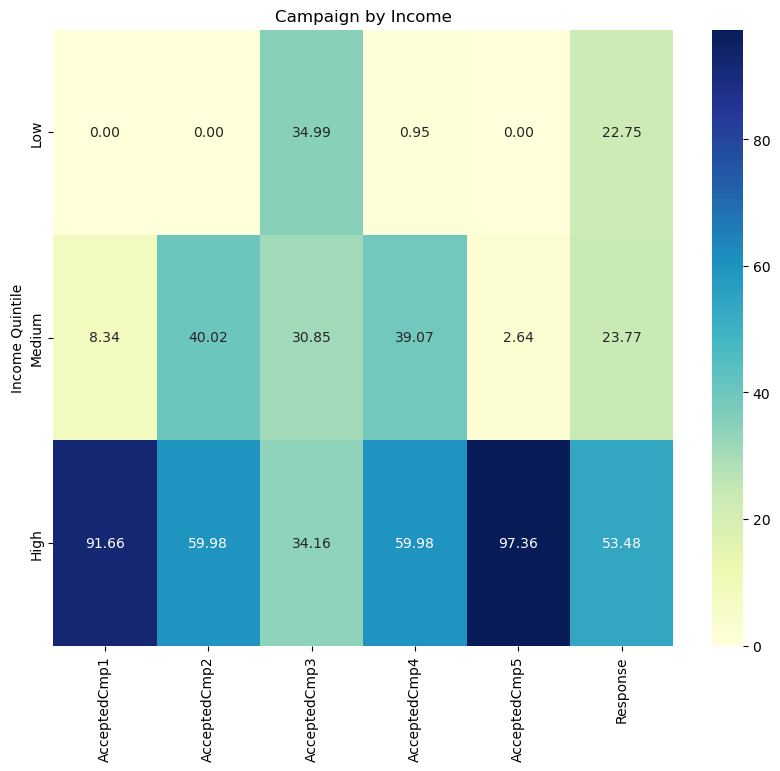

In [34]:
response_by_income = df.groupby('Income Quintile', observed=True)[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].mean()
response_by_income_percentage = response_by_income.div(response_by_income.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(response_by_income_percentage, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Campaign by Income')


 **Insights**

 * Accepted Campaign 1: High-income group had the highest acceptance rate (91.66%), followed by Medium-income group (8.34%) and Low-income group (0%).

 * Accepted Campaign 2: High-income group had the highest acceptance rate (59.98%), followed by Medium-income group (40.02%) and Low-income group (0%).


 * Accepted Campaign 3: Low-income group had the highest acceptance rate (34.99%), followed by High-income group (34.15%) and Medium-income group (30.85%).

 * Accepted Campaign 4: High-income group had the highest acceptance rate (59.98%), followed by Medium-income group (39.07%) and Low-income group (0.95%).

 * Accepted Campaign 5: High-income group had the highest acceptance rate (97.36%), followed by Medium-income group (2.64%) and Low-income group (0%).

 * Response(Accepted Campaign 6): High-income group had the highest acceptance rate (53.48%), followed by Medium-income group (23.77%) and Low-income group (22.75%).




Majority were those with the highest income(28 percent), followed by low income(13 percent), medium income(11 percent), lowest income(10 percent), high income(10 percent).

# **Purchase behaviors**

## **Purchase behaviours by Age group**

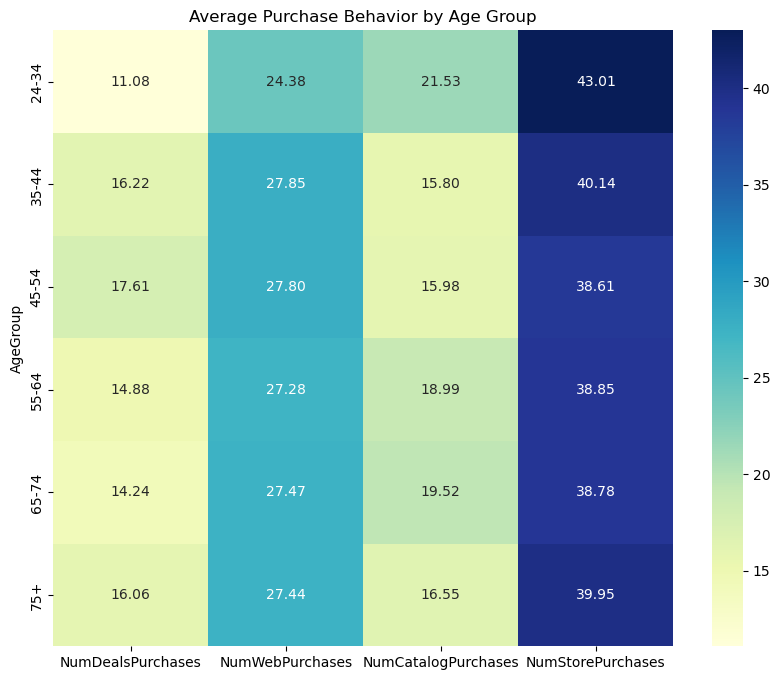

In [35]:
age_vs_pb = df.groupby('AgeGroup')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
age_vs_pb_percentage = age_vs_pb.div(age_vs_pb.sum(axis=1), axis=0) * 100
#plotting
plt.figure(figsize=(10, 8))
sns.heatmap(age_vs_pb_percentage, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Purchase Behavior by Age Group')
plt.show()

**Insights**

* 24-34: In-store purchases appear to be most popular in this category (43.01%), followed by web (24.38%), catalog (21.53%), and deals (11.08%).

* 35-44: In-store purchases appear to be most popular in this category (40.14%), followed by web (27.85%), deals (16.22%) and catalog (15.80%).

* 45-54: In-store purchases appear to be most popular in this category (38.61%), followed by web (27.80%), deals (17.61%) and catalog (15.98%).

* 55-64: In-store purchases appear to be most popular in this category (38.85%), followed by web (27.28%), catalog (18.99%), and deals (14.88%).

* 65-74: In-store purchases appear to be most popular in this category (38.78%), followed by web (27.47%), catalog (19.52%), and deals (14.24%).

* 75+: In-store purchases appear to be most popular in this category (39.95%), followed by web (27.44%), catalog (16.55%), and deals (16.06%).

### **Age group vs webvisits**

In [36]:
age_vs_webv = df.groupby('AgeGroup')[['NumWebVisitsMonth']].mean()
age_webv_df = age_vs_webv.div(age_vs_webv.sum(axis=0), axis=1) * 100

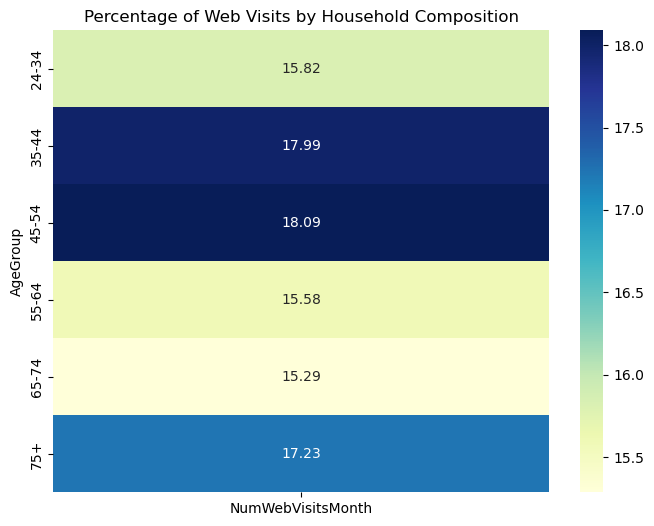

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(age_webv_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Percentage of Web Visits by Household Composition')
plt.show()

**Insights**

* 45-54 (18.09%) appear to be the most regular monthly online visitors, followed by 35-44 (17.99%), 75+ (17.23%), 24-34 (15.82%), 55-64 (15.58%), and 65-75 (15.29%).


## **Purchase behaviours by Education**

In [38]:
education_vs_pb = df.groupby('Education')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
percentage_df = education_vs_pb.div(education_vs_pb.sum(axis=1), axis=0) * 100

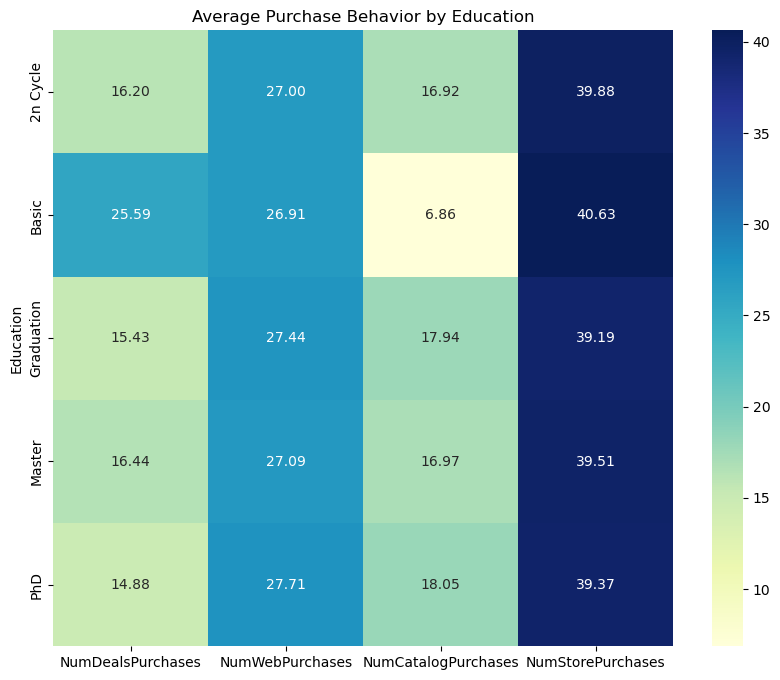

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(percentage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Purchase Behavior by Education')
plt.show()

**Insights**

2nd Cycle: In-store purchases appear to be most popular in this category (39.88%), followed by web (27.00%), catalog (16.92%) and deals (16.20%).

Basic: In-store purchases appear to be most popular in this category (40.63%), followed by web (26.91%), deals (25.59%) and catalog (6.86%).

Graduation: In-store purchases appear to be most popular in this category (39.19%), followed by web (27.44%), catalog (17.94%), and deals (15.43%).

Master: In-store purchases appear to be most popular in this category (39.51%), followed by web (27.09%), catalog (16.97%), and deals (16.44%).

PhD: In-store purchases appear to be most popular in this category (39.37%), followed by web (27.71%), catalog (18.05%), and deals (14.88%).




### **Web visits by Education**

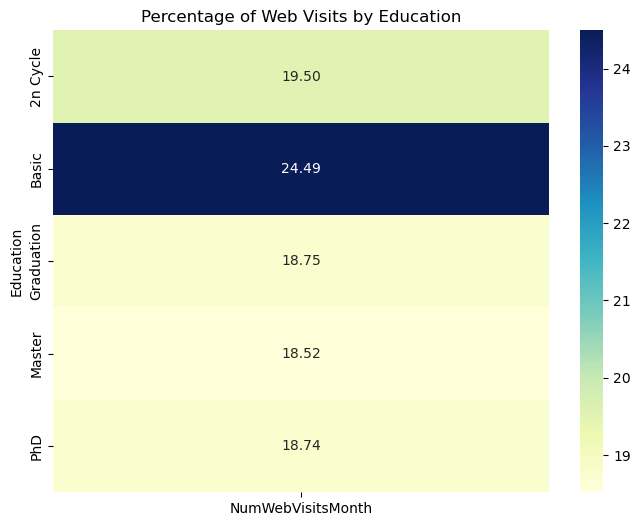

In [40]:
education_vs_webv = df.groupby('Education')[['NumWebVisitsMonth']].mean()
edu_webv_percentage_df = education_vs_webv.div(education_vs_webv.sum(axis=0), axis=1) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(edu_webv_percentage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Percentage of Web Visits by Education')
plt.show()

**Insights**

* Basic (24.49%) appear to be the most regular monthly online visitors, followed by 2nd Cylce (19.50%), graduation (18.75%), PhD (18.74%) and master (18.52%).

## **Purchase behaviours by Marital status**

In [41]:
pb_by_ms = df.groupby('Marital_Status')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
pb_by_ms_percentage_df = pb_by_ms.div(pb_by_ms.sum(axis=1), axis=0) * 100

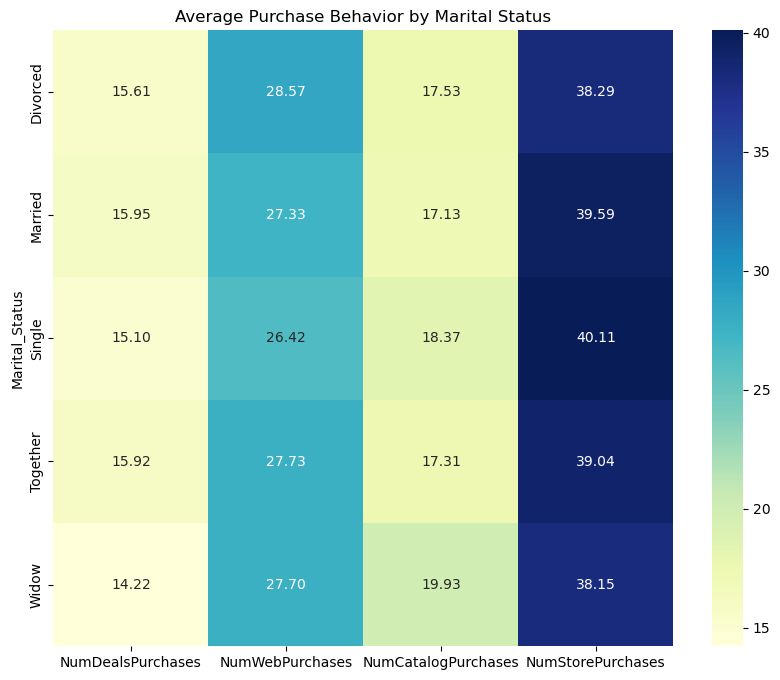

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(pb_by_ms_percentage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Purchase Behavior by Marital Status')
plt.show()

**Insights**

* Divorced: In-store purchases appear to be most popular in this category (38.29%), followed by web (28.57%), catalog (17.53%), and deals (15.61%).

* Married: In-store purchases appear to be most popular in this category (39.59%), followed by web (27.33%), catalog (17.13%), and deals (15.95%).

* Single: In-store purchases appear to be most popular in this category (40.11%), followed by web (26.42%), catalog (18.37%), and deals (15.10%).

* Together: In-store purchases appear to be most popular in this category (39.04%), followed by web (27.73%), catalog (17.31%), and deals (15.92%).

* Widow: In-store purchases appear to be most popular in this category (38.15%), followed by web (27.70%), catalog (19.93%), and deals (14.22%).

### **Web visits by marital status**

In [43]:
ms_vs_webv = df.groupby('Marital_Status')[['NumWebVisitsMonth']].mean()
ms_webv_percentage_df = ms_vs_webv.div(ms_vs_webv.sum(axis=0), axis=1) * 100

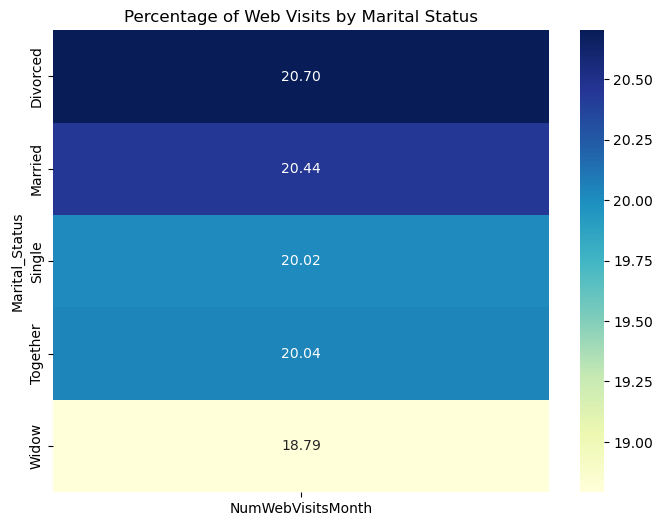

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(ms_webv_percentage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Percentage of Web Visits by Marital Status')
plt.show()

**Insights**

* Divorced (20.70%) appear to be the most regular monthly online visitors, followed by married (20.44%), together (20.04%), single (20.02%) and widow (18.79%).




## **Purchase behaviours by No of children at home**

Kidhome

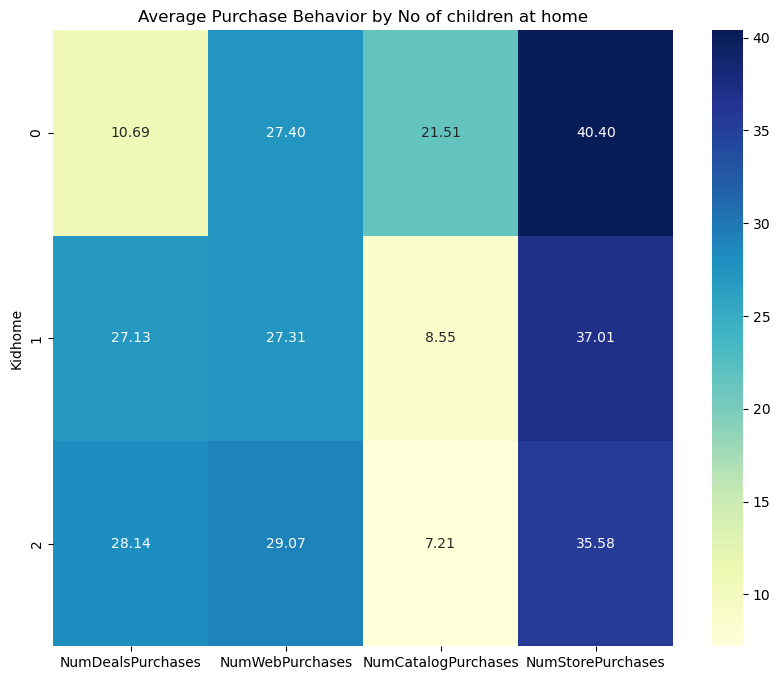

In [45]:
pb_by_no_children = df.groupby('Kidhome')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
pb_by_no_children_percentage_df = pb_by_no_children.div(pb_by_no_children.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(pb_by_no_children_percentage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Purchase Behavior by No of children at home')
plt.show()

**Insights**

*  No kids: In-store purchases appear to be most popular in this category (40.40%), followed by web (27.40%), catalog (21.51%), and deals (10.69%).

* 1 small kid: In-store purchases appear to be most popular in this category (37.01%), followed by web (27.31%), catalog (27.13%), and deals (8.55%).

* 2 small kids: In-store purchases appear to be most popular in this category (35.58%), followed by web (29.07%), catalog (28.14%), and deals (7.21%).

### **Web visits by number of children at home**

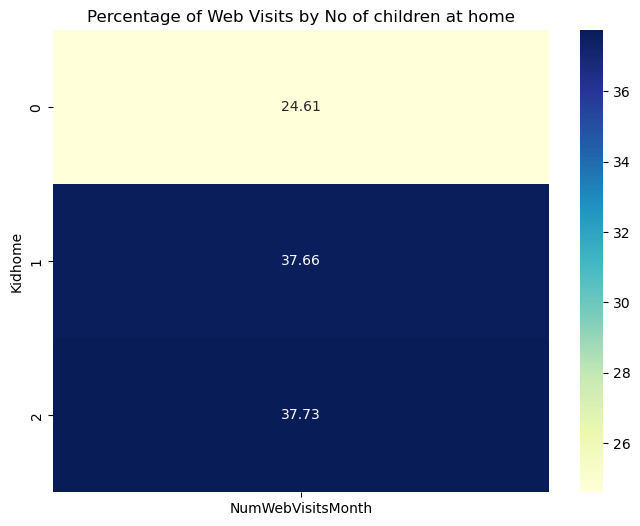

In [46]:
no_children_vs_webv = df.groupby('Kidhome')[['NumWebVisitsMonth']].mean()
no_children_webv_percentage_df = no_children_vs_webv.div(no_children_vs_webv.sum(axis=0), axis=1) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(no_children_webv_percentage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Percentage of Web Visits by No of children at home')
plt.show()

Results

* Those with two small children (37.73%) tend to be the most frequent monthly web visitors, followed by those with one small child (37.66%) and no small children (24.61%).

### **Teenage home**

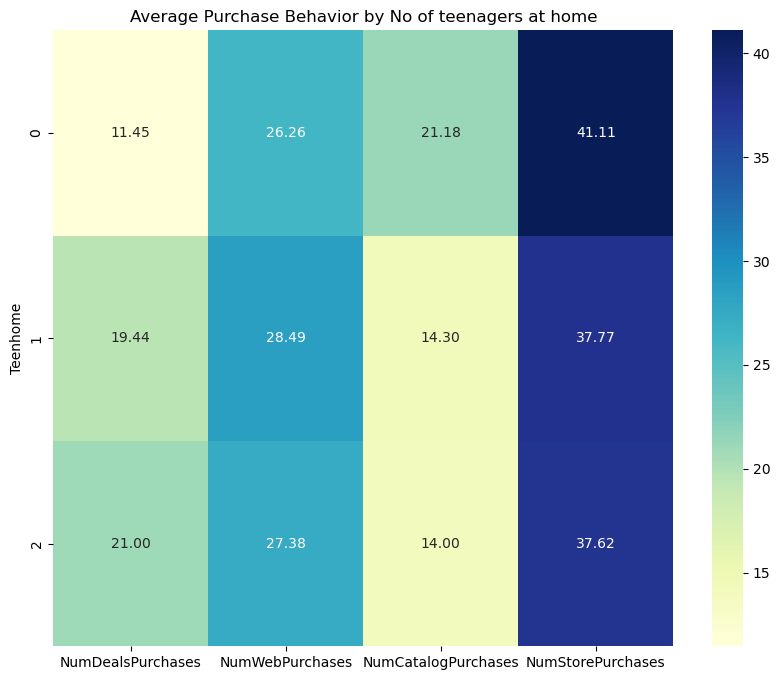

In [47]:
pb_by_no_children = df.groupby('Teenhome')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
pb_by_no_children_percentage_df = pb_by_no_children.div(pb_by_no_children.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(pb_by_no_children_percentage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Purchase Behavior by No of teenagers at home')
plt.show()

**Insights**

*  No kids: In-store purchases appear to be most popular in this category (41.11%), followed by web (26.26%), catalog (21.18%), and deals (11.45%).

* 1 small kid: In-store purchases appear to be most popular in this category (37.77%), followed by web (28.49%), deals (19.44%), and deals (14.30%).

* 2 small kids: In-store purchases appear to be most popular in this category (37.62%), followed by web (27.38%), deals (21.00%), and deals (14.00%).

### **Web visits by number of teenagers at home**

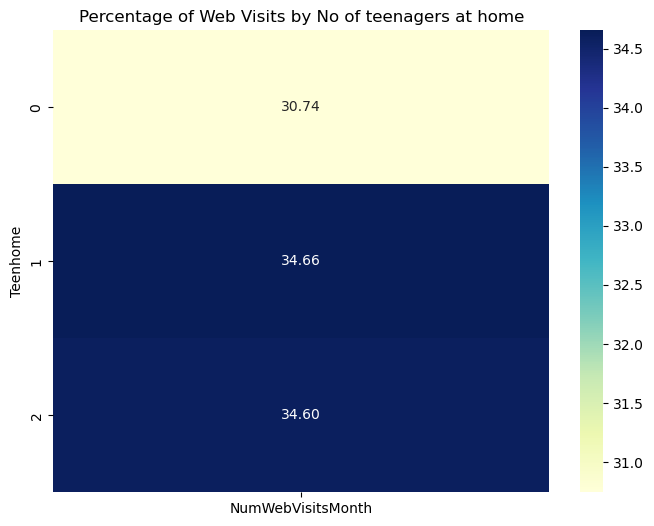

In [48]:
no_teen_vs_webv = df.groupby('Teenhome')[['NumWebVisitsMonth']].mean()
no_teen_vs_webv_percentage_df = no_teen_vs_webv.div(no_teen_vs_webv.sum(axis=0), axis=1) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(no_teen_vs_webv_percentage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Percentage of Web Visits by No of teenagers at home')
plt.show()

Results

* Those with two small children (34.60%) tend to be the most frequent monthly web visitors, followed by those with one small child (34.66%) and no small children (30.74%).

## **Purchase behaviours by Income**

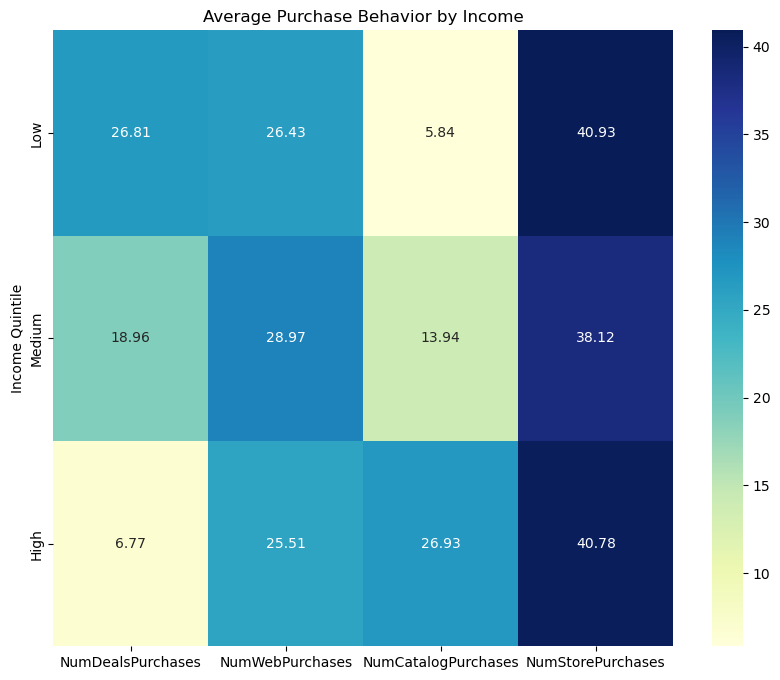

In [49]:
pb_income = df.groupby('Income Quintile', observed=True)[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
pb_income_percentage_df = round(pb_income.div(pb_income.sum(axis=1), axis=0) * 100,2)

plt.figure(figsize=(10, 8))
sns.heatmap(pb_income_percentage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Purchase Behavior by Income')
plt.show()

**insights**



*  Low: In-store purchases appear to be most popular in this category (40.93%), followed by web (26.43%), deals (26.81%), and catalog (5.84%).

* Medium: In-store purchases appear to be most popular in this category (38.12%), followed by web (28.97%), deals (18.96%), and deals (13.94%).

* High: In-store purchases appear to be most popular in this category (40.78%), followed by catalog (26.93%), web (25.51%), and deals (6.77%).



### **Web visits by income**

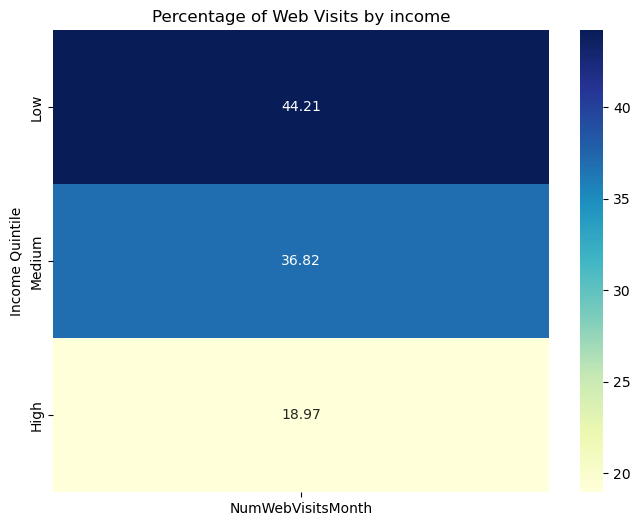

In [50]:
income_by_webv = df.groupby('Income Quintile', observed=True)[['NumWebVisitsMonth']].mean()
income_by_webv_percentage_df = income_by_webv.div(income_by_webv.sum(axis=0), axis=1) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(income_by_webv_percentage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Percentage of Web Visits by income')
plt.show()

Results

* Low-income individuals (44.21%) are the most frequent monthly web visitors, followed by those with medium (34.82%) and high incomes (18.97%).

# **Correlations**

### **Joining kidhome and teenhome.**

In [51]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

### **interaction_correlations**

In [52]:
df['Income_AcceptedCmp3'] = df['Income'] * df['AcceptedCmp3']
df['Income_AcceptedCmp4'] = df['Income'] * df['AcceptedCmp4']
df['Income_AcceptedCmp5'] = df['Income'] * df['AcceptedCmp5']
df['Income_AcceptedCmp1'] = df['Income'] * df['AcceptedCmp1']
df['Income_MntMeatProducts'] = df['Income'] * df['MntMeatProducts']
df['Age_Total_Children'] = df['Income'] * df['Total_Children']



### **correlation**

In [53]:
edu_dummies = pd.get_dummies(df['Education'],dtype=int)
marital_dummies = pd.get_dummies(df['Marital_Status'], dtype = int)
age_group_dummies = pd.get_dummies(df['AgeGroup'], dtype = int)
income_quintile = pd.get_dummies(df['Income Quintile'], dtype = int)
df1=df
df = pd.concat([df, edu_dummies],axis=1)
df = pd.concat([df, marital_dummies],axis=1)
df = pd.concat([df, age_group_dummies],axis=1)
df = pd.concat([df, income_quintile],axis=1)

df.drop(['Education','Marital_Status','AgeGroup','Income Quintile','Kidhome','Teenhome','Income','Age'], axis = 1, inplace = True)


In [54]:
variable_of_interest = 'Response'

# Extract the correlations of the selected variable with others
correlation_matrix = df.corr()
correlations = correlation_matrix[[variable_of_interest]]
sorted_correlations = correlations.sort_values(by=variable_of_interest, ascending=False)

# Print the sorted correlations
print(sorted_correlations)

                        Response
Response                1.000000
Income_AcceptedCmp5     0.288501
AcceptedCmp5            0.285041
Income_AcceptedCmp1     0.284755
AcceptedCmp1            0.279249
AcceptedCmp3            0.251293
Income_MntMeatProducts  0.249068
Income_AcceptedCmp3     0.242245
MntMeatProducts         0.240522
NumCatalogPurchases     0.220862
MntWines                0.206539
High                    0.172672
Income_AcceptedCmp4     0.171546
NumWebPurchases         0.154468
AcceptedCmp4            0.152440
MntGoldProds            0.140048
AcceptedCmp2            0.134284
MntFruits               0.120568
Single                  0.110006
MntSweetProducts        0.108931
MntFishProducts         0.105218
PhD                     0.079207
Divorced                0.058032
Widow                   0.038782
35-44                   0.028801
NumStorePurchases       0.021127
NumDealsPurchases       0.019327
45-54                   0.016701
NumWebVisitsMonth       0.013819
65-74     

# **New Model**

In [55]:
features = ['MntWines', 'MntMeatProducts',  'NumCatalogPurchases', 'NumWebPurchases',
            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
             'Recency', 'High','Income_AcceptedCmp3', 'Income_AcceptedCmp4',
            'Income_AcceptedCmp5','Income_AcceptedCmp1','Total_Children','Income_MntMeatProducts','Age_Total_Children']

X = df[features]
y = df['Response']

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Train model
model = RandomForestClassifier(n_estimators = 200,
    max_depth = 20,
    min_samples_split = 5,
    min_samples_leaf = 1,
    bootstrap=True,
    random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))


Accuracy: 0.8962848297213623
AUC: 0.7168181141069566


                   Feature  Importance
8                  Recency    0.154449
15  Income_MntMeatProducts    0.119365
1          MntMeatProducts    0.118833
0                 MntWines    0.115274
16      Age_Total_Children    0.089598
2      NumCatalogPurchases    0.071329
3          NumWebPurchases    0.063603
10     Income_AcceptedCmp3    0.056504
12     Income_AcceptedCmp5    0.038050
13     Income_AcceptedCmp1    0.035738
4             AcceptedCmp3    0.034551
11     Income_AcceptedCmp4    0.026387
7             AcceptedCmp1    0.021515
14          Total_Children    0.021385
6             AcceptedCmp5    0.017165
5             AcceptedCmp4    0.009303
9                     High    0.006952


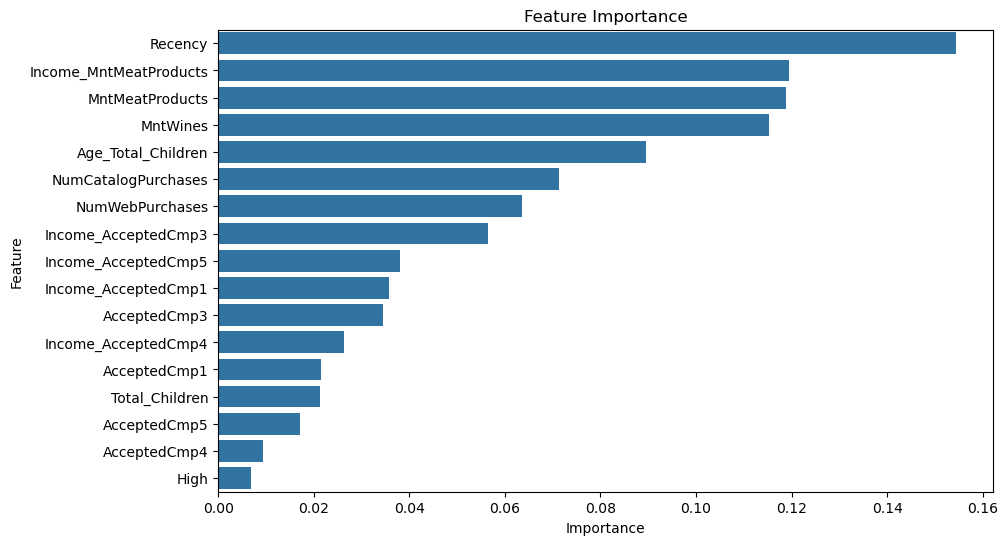

In [58]:
# Feature importance from the fitted Random Forest model
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Plot the feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [59]:
from sklearn.metrics import root_mean_squared_error
rmse_test = root_mean_squared_error(y_test, y_pred)
print(f'RMSE = {rmse_test}')

RMSE = 0.32204839741665814


In [60]:

from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[534  14]
 [ 53  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       548
           1       0.76      0.46      0.57        98

    accuracy                           0.90       646
   macro avg       0.84      0.72      0.76       646
weighted avg       0.89      0.90      0.89       646



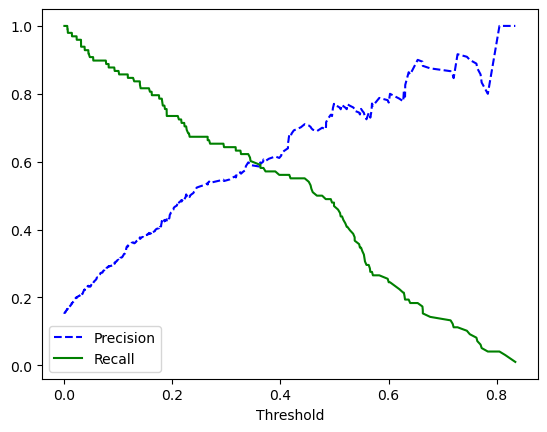

In [67]:

from sklearn.metrics import precision_recall_curve, classification_report

# Assuming model is your trained RandomForestClassifier and X_test is your test data
y_pred = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate precision-recall pairs for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# You can plot precision vs recall to visualize the trade-off
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.show()


In [68]:
# Example: Let's say you decide a threshold of 0.3 gives you a better recall
threshold = 0.2
y_pred_new = (y_pred >= threshold).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))
# Evaluate the performance with the new threshold
print(classification_report(y_test, y_pred_new))


Confusion Matrix:
 [[463  85]
 [ 26  72]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       548
           1       0.46      0.73      0.56        98

    accuracy                           0.83       646
   macro avg       0.70      0.79      0.73       646
weighted avg       0.87      0.83      0.84       646



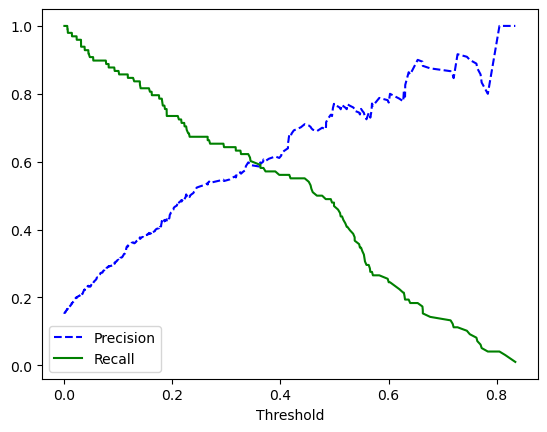

In [69]:
y_pred_new = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate precision-recall pairs for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_new)

# You can plot precision vs recall to visualize the trade-off
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.show()

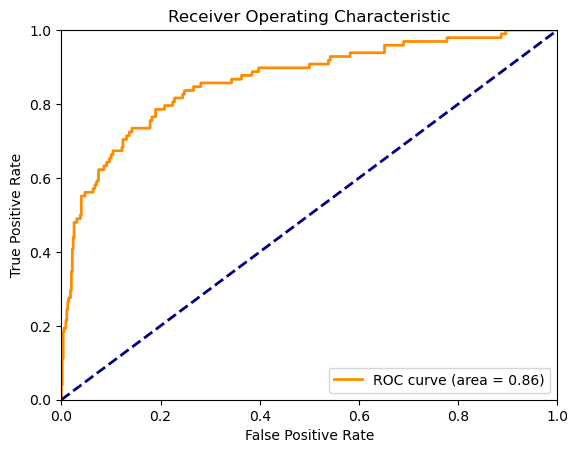

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_prob are the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

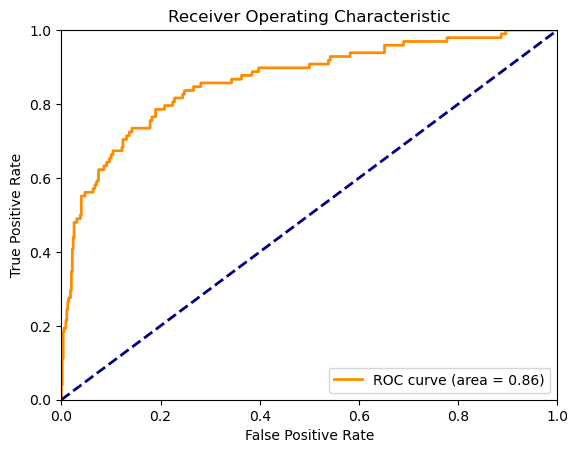

In [72]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_prob are the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_new)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test are the true labels, y_pred_orig are predictions from the original model,
# and y_pred_new are predictions from the improved model.

# Original Model Confusion Matrix
cm_orig = confusion_matrix(y_test, y_pred)
disp_orig = ConfusionMatrixDisplay(confusion_matrix=cm_orig)

# Improved Model Confusion Matrix
cm_new = confusion_matrix(y_test, y_pred_new)
disp_new = ConfusionMatrixDisplay(confusion_matrix=cm_new)

# Plotting side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
disp_orig.plot(ax=ax[0])
ax[0].set_title('Original Model')

disp_new.plot(ax=ax[1])
ax[1].set_title('Improved Model')

plt.show()

ValueError: Classification metrics can't handle a mix of binary and continuous targets

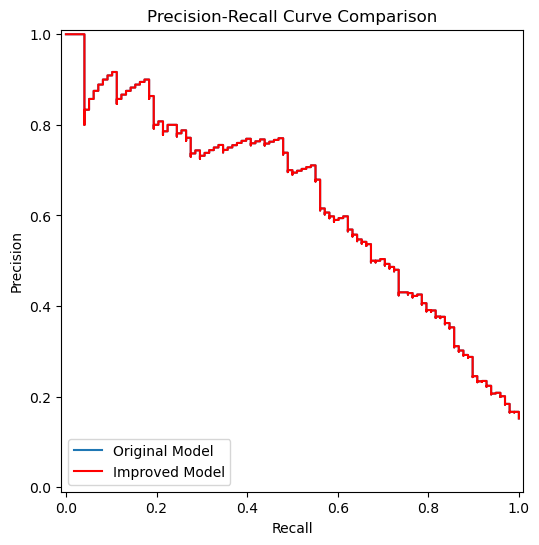

In [75]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Assuming y_prob_orig and y_prob_new are the probability estimates from the original and improved models.

# Precision-Recall for Original Model
precision_orig, recall_orig, _ = precision_recall_curve(y_test, y_pred)
pr_display_orig = PrecisionRecallDisplay(precision=precision_orig, recall=recall_orig)

# Precision-Recall for Improved Model
precision_new, recall_new, _ = precision_recall_curve(y_test, y_pred_new)
pr_display_new = PrecisionRecallDisplay(precision=precision_new, recall=recall_new)

# Plotting both curves
fig, ax = plt.subplots(figsize=(8, 6))
pr_display_orig.plot(ax=ax, name='Original Model')
pr_display_new.plot(ax=ax, name='Improved Model', color='red')

plt.title('Precision-Recall Curve Comparison')
plt.show()


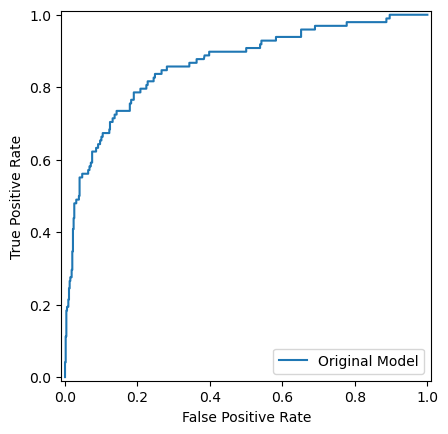

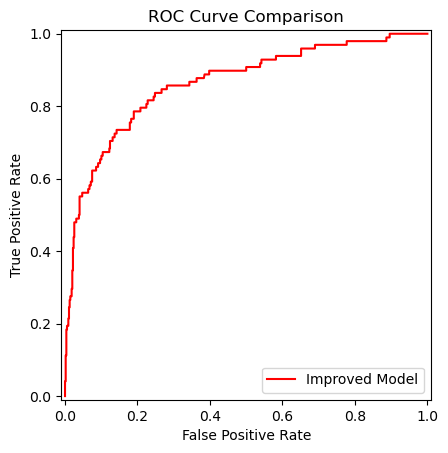

In [78]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# ROC Curve for Original Model
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_pred)
roc_display_orig = RocCurveDisplay(fpr=fpr_orig, tpr=tpr_orig).plot(label='Original Model')

# ROC Curve for Improved Model
fpr_new, tpr_new, _ = roc_curve(y_test, y_pred_new)
roc_display_new = RocCurveDisplay(fpr=fpr_new, tpr=tpr_new).plot(label='Improved Model', color='red')

plt.title('ROC Curve Comparison')
plt.show()


In [79]:
# Example: Adjusting the threshold
threshold = 0.2  # Example threshold
y_pred_new_threshold = (y_pred_new >= threshold).astype(int)
y_pred_orig_threshold = (y_pred >= threshold).astype(int)

# Recalculate confusion matrices
cm_orig = confusion_matrix(y_test, y_pred_orig_threshold)
cm_new = confusion_matrix(y_test, y_pred_new_threshold)


In [80]:
cm_orig

array([[463,  85],
       [ 26,  72]])

In [81]:
cm_new

array([[463,  85],
       [ 26,  72]])

Accuracy: 0.8962848297213623
AUC: 0.8632224787725309


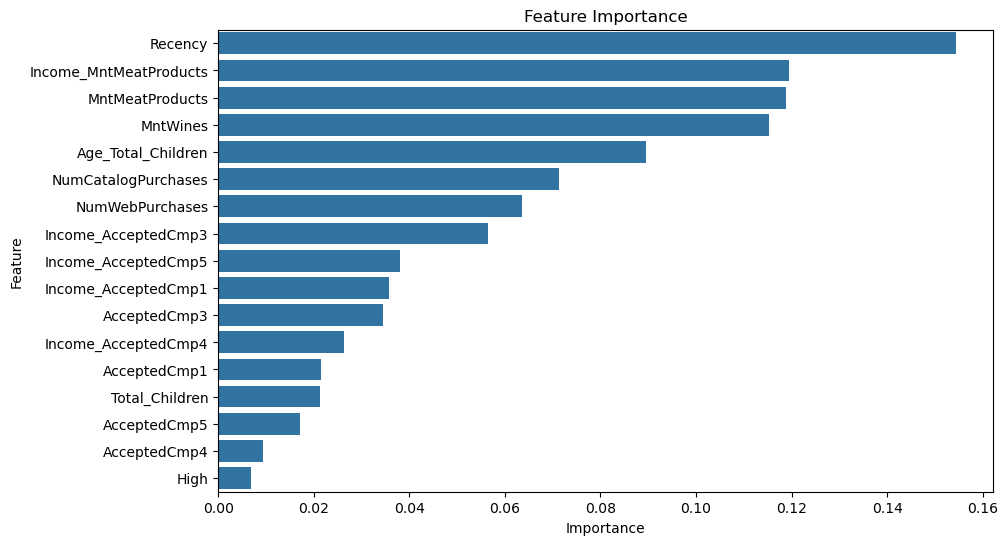

Confusion Matrix:
 [[534  14]
 [ 53  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       548
           1       0.76      0.46      0.57        98

    accuracy                           0.90       646
   macro avg       0.84      0.72      0.76       646
weighted avg       0.89      0.90      0.89       646

Confusion Matrix with 0.2 threshold:
 [[463  85]
 [ 26  72]]
Classification Report with 0.2 threshold:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       548
           1       0.46      0.73      0.56        98

    accuracy                           0.83       646
   macro avg       0.70      0.79      0.73       646
weighted avg       0.87      0.83      0.84       646



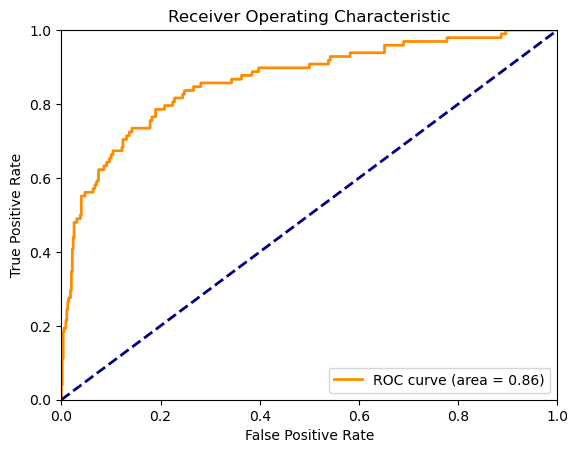

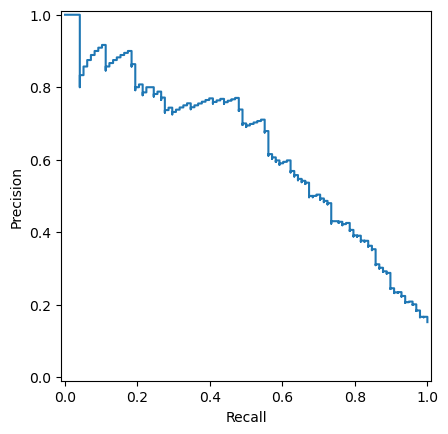

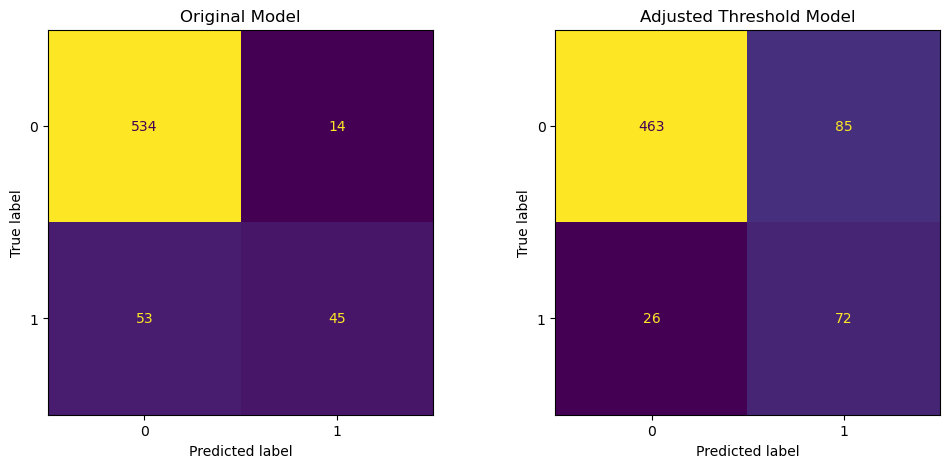

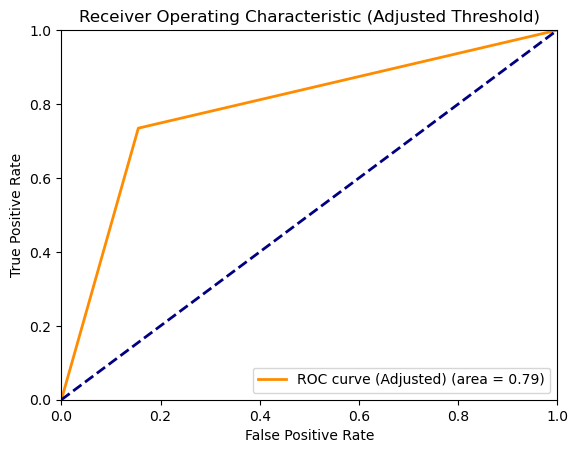

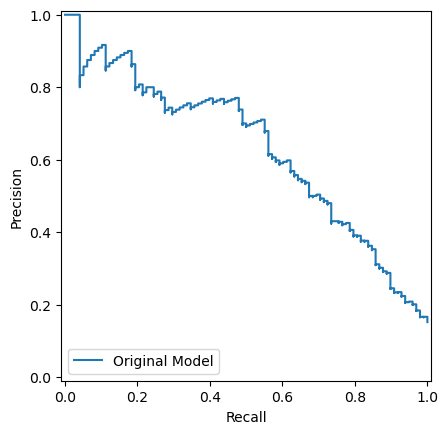

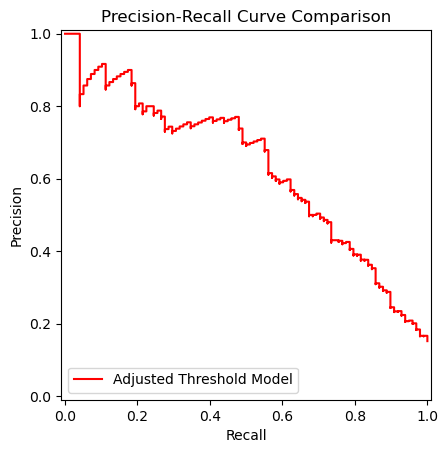

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate model on test data
y_pred = model.predict(X_test)  # Predicted class labels
y_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_prob))

# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.savefig('Feature Importance.png')
plt.show()

# Confusion Matrix for default threshold (0.5)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Adjusting the threshold to 0.2 for better recall
threshold = 0.2
y_pred_new = (y_prob >= threshold).astype(int)  # Apply the threshold on probabilities

print("Confusion Matrix with 0.2 threshold:\n", confusion_matrix(y_test, y_pred_new))
print("Classification Report with 0.2 threshold:\n", classification_report(y_test, y_pred_new))

# ROC Curve for the original and new thresholds
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_prob)
roc_auc_orig = auc(fpr_orig, tpr_orig)

plt.figure()
plt.plot(fpr_orig, tpr_orig, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_orig)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()

# Precision-Recall Curve for original and adjusted thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
pr_display_orig = PrecisionRecallDisplay(precision=precisions, recall=recalls).plot()

# Compare Confusion Matrices
cm_orig = confusion_matrix(y_test, y_pred)
cm_new = confusion_matrix(y_test, y_pred_new)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_orig).plot(ax=ax[0], colorbar=False)
ax[0].set_title('Original Model')

ConfusionMatrixDisplay(cm_new).plot(ax=ax[1], colorbar=False)
ax[1].set_title('Adjusted Threshold Model')
plt.savefig('Adjusted Threshold Model.png')
plt.show()

# ROC Curve for the adjusted threshold
fpr_new, tpr_new, _ = roc_curve(y_test, y_pred_new)
roc_auc_new = auc(fpr_new, tpr_new)

plt.figure()
plt.plot(fpr_new, tpr_new, color='darkorange', lw=2, label='ROC curve (Adjusted) (area = %0.2f)' % roc_auc_new)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Adjusted Threshold)')
plt.legend(loc="lower right")
plt.savefig('Receiver Operating Characteristic (Adjusted Threshold).png')
plt.show()

# Precision-Recall Curve Comparison
pr_display_orig.plot(label='Original Model')
PrecisionRecallDisplay(precision=precisions, recall=recalls).plot(label='Adjusted Threshold Model', color='red')
plt.title('Precision-Recall Curve Comparison')
plt.savefig('Precision-Recall Curve Comparison.png')
plt.show()
